Вариант - Датасет о вине


Подключаем нужные и разрешенные библиотеки

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/WineDataset.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Wine'}>, <Axes: >, <Axes: >]],
      dtype=object)

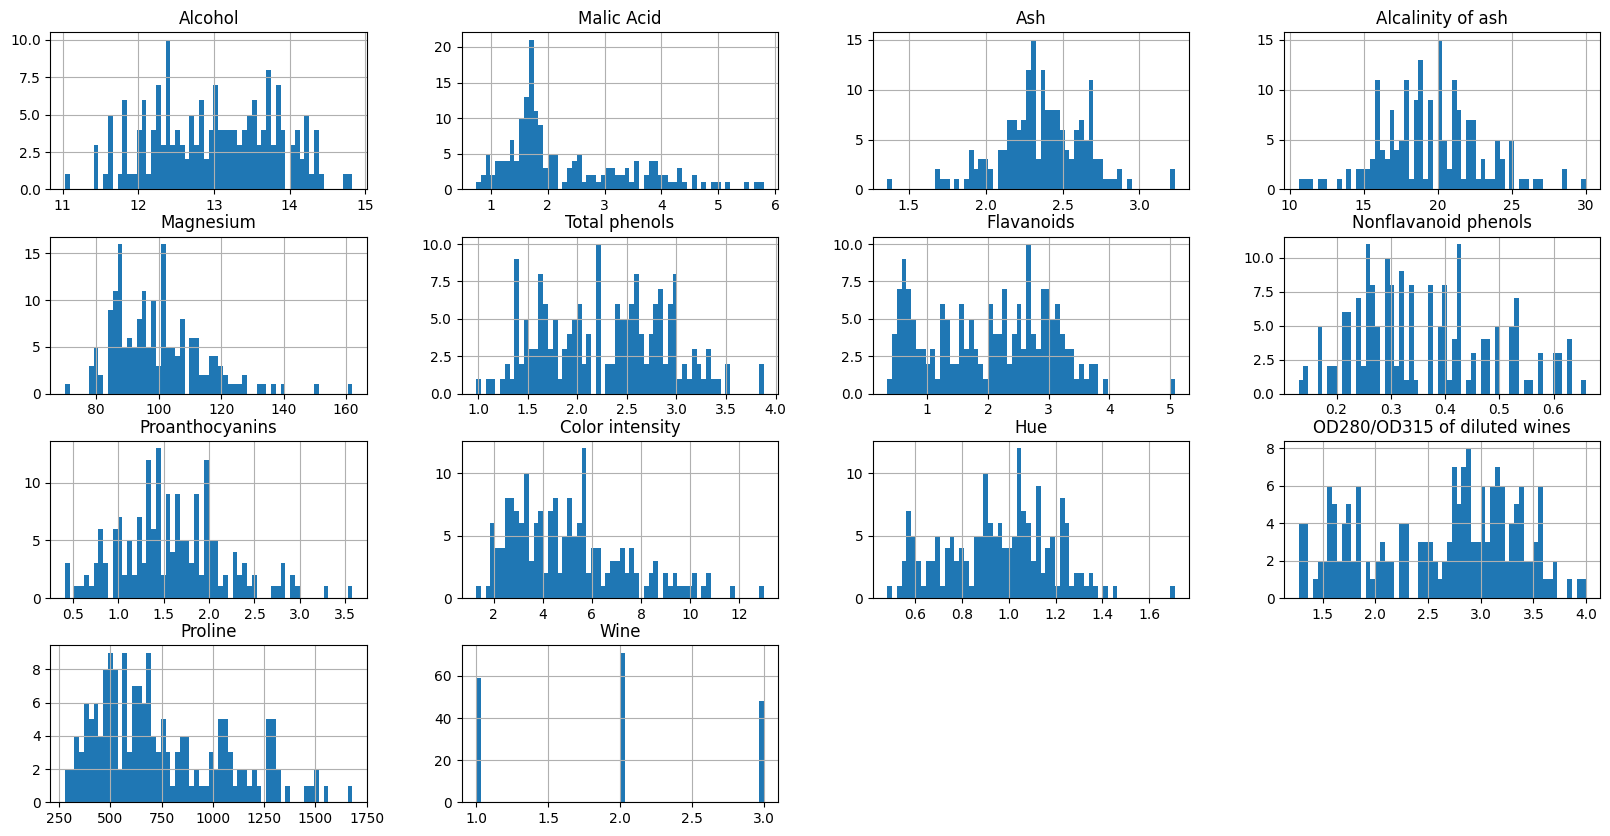

In [ ]:
# Визуализируем данные
df.hist(bins=60, figsize=(20, 10))

In [ ]:
#Проверка отсутствующих значений
df.isna().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

Кодирование категориальных признаков - нет, переходим к масштабироанию

In [ ]:
X = df.drop(columns=['Wine'])
y = df['Wine']

In [ ]:

def MinMaxScaler(A):
    for i in A.columns:
        max_i = A[i].max()
        min_i = A[i].min()
        A[i] = (A[i] - min_i) / (max_i - min_i)
    return A

In [ ]:
train_percentage = 0.7
random_state = 29576

train = df.sample(frac=train_percentage, random_state=random_state)
test = df.drop(train.index)

train_x = train.drop('Wine', axis=1)
train_y = train['Wine']

print(train_y.value_counts())

test_x = test.drop('Wine', axis=1)
test_y = test['Wine']

print(test_y.value_counts())

Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def k_nearest_neighbors(train_x, train_y, test_instance, k):
    distances = np.array([euclidean_distance(train_instance, test_instance) for train_instance in train_x.values])
    nearest_neighbors_indices = np.argsort(distances)[:k]
    nearest_neighbors_labels = train_y.iloc[nearest_neighbors_indices].values
    unique_labels, counts = np.unique(nearest_neighbors_labels, return_counts=True)
    predicted_label = unique_labels[np.argmax(counts)]
    return predicted_label
def custom_confusion_matrix(true_labels, predicted_labels):
    num_classes = len(np.unique(true_labels))
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        confusion_matrix[true_label, predicted_label] += 1

    return confusion_matrix

- Постройте две модели k-NN с различными наборами признаков:
    - Модель 1: Признаки случайно отбираются .
    - Модель 2: Фиксированный набор признаков, который выбирается заранее.

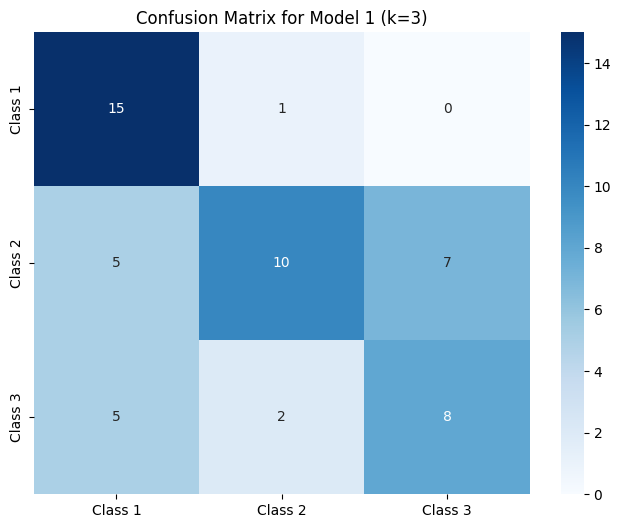

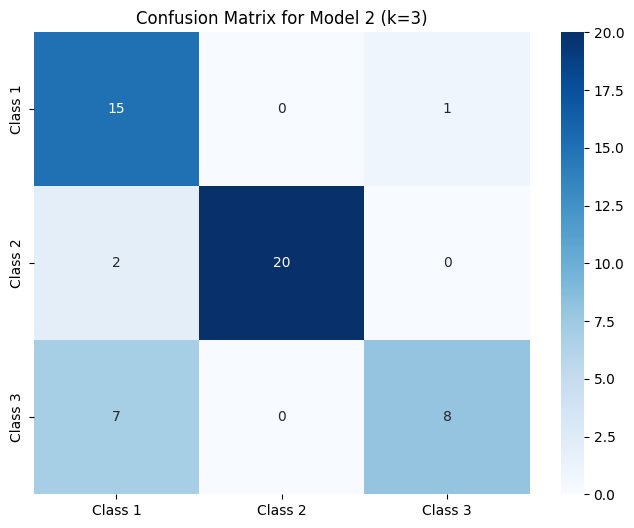

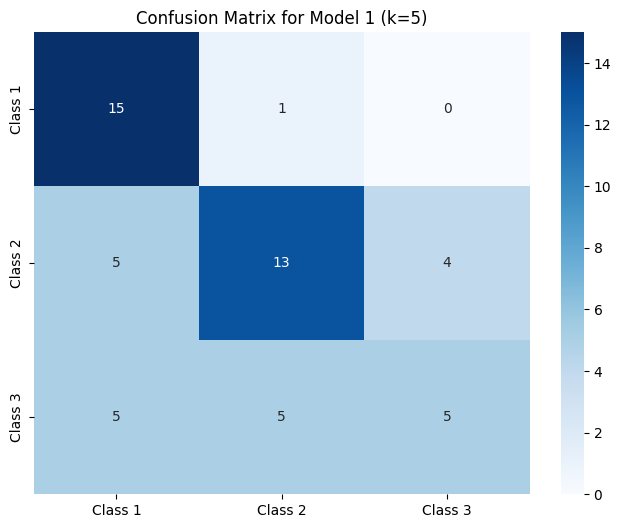

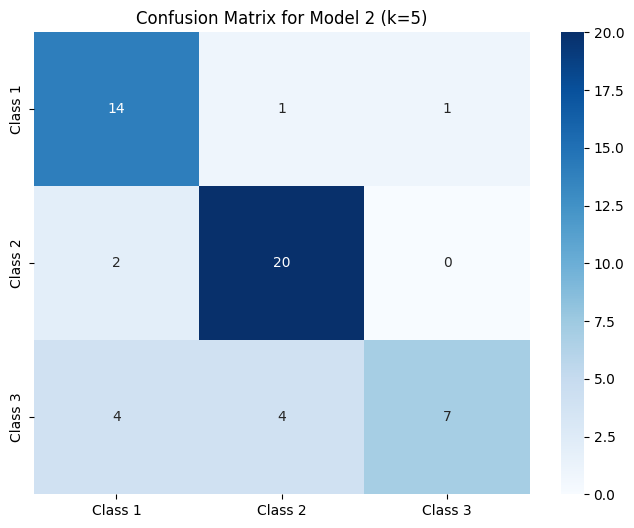

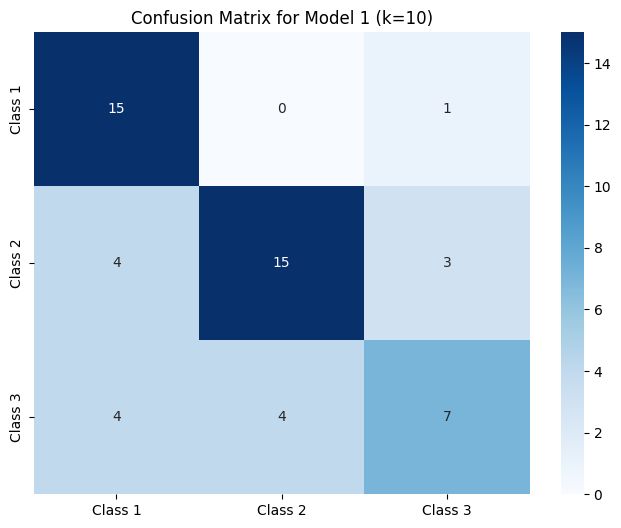

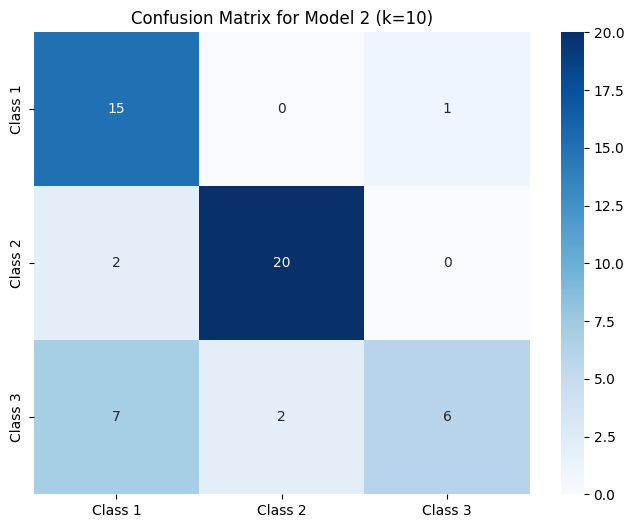

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

random_features = np.random.choice(X.columns, size=2, replace=False)
model_1_X_train = train_x[random_features]
model_1_X_test = test_x[random_features]

fixed_features = ["Alcohol","Color intensity"]
model_2_X_train = train_x[fixed_features]
model_2_X_test = test_x[fixed_features]


k_values = [3, 5, 10]

for k in k_values:
    # М1
    predictions_1 = np.array([k_nearest_neighbors(model_1_X_train, train_y, test_instance, k) for test_instance in model_1_X_test.values])
    cm_1 = confusion_matrix(test_y, predictions_1)

    # тепловая карта для Model 1
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_1, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
    plt.title(f"Confusion Matrix for Model 1 (k={k})")
    plt.show()

    # М2
    predictions_2 = np.array([k_nearest_neighbors(model_2_X_train, train_y, test_instance, k) for test_instance in model_2_X_test.values])
    cm_2 = confusion_matrix(test_y, predictions_2)

    # тепловая карта для Model 2
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_2, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
    plt.title(f"Confusion Matrix for Model 2 (k={k})")
    plt.show()


In [ ]:

from sklearn.metrics import confusion_matrix

random_features = np.random.choice(X.columns, size=2, replace=False)
model_1_X_train = train_x[random_features]
model_1_X_test = test_x[random_features]

fixed_features = ["Alcohol","Color intensity"]
model_2_X_train = train_x[fixed_features]
model_2_X_test = test_x[fixed_features]


k_values = [3, 5, 10]

for k in k_values:
    # Модель 1
    predictions_1 = np.array([k_nearest_neighbors(model_1_X_train, train_y, test_instance, k) for test_instance in model_1_X_test.values])
    cm_1 = confusion_matrix(test_y, predictions_1)
    print(f"Confusion Matrix for Model 1 (k={k}):\n{cm_1}\n")

    # Модель 2
    predictions_2 = np.array([k_nearest_neighbors(model_2_X_train, train_y, test_instance, k) for test_instance in model_2_X_test.values])
    cm_2 = confusion_matrix(test_y, predictions_2)
    print(f"Confusion Matrix for Model 2 (k={k}):\n{cm_2}\n")

Confusion Matrix for Model 1 (k=3):
[[12  4  0]
 [ 6 12  4]
 [ 0  0 15]]

Confusion Matrix for Model 2 (k=3):
[[15  0  1]
 [ 2 20  0]
 [ 7  0  8]]

Confusion Matrix for Model 1 (k=5):
[[15  1  0]
 [ 5 13  4]
 [ 0  1 14]]

Confusion Matrix for Model 2 (k=5):
[[14  1  1]
 [ 2 20  0]
 [ 4  4  7]]

Confusion Matrix for Model 1 (k=10):
[[16  0  0]
 [ 4 15  3]
 [ 0  2 13]]

Confusion Matrix for Model 2 (k=10):
[[15  0  1]
 [ 2 20  0]
 [ 7  2  6]]

